<a href="https://colab.research.google.com/github/fuse-nine/weather-widget/blob/master/Skillbox_%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_3_%D0%B4%D0%B5%D0%BD%D1%8C_1_07_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ДЗ 2: рассмотреть данные по следующей ссылке изученными методами. Написать отчет, в котором должны содержаться следующие пункты:

1) какие выводы можно сделать по данным,

2) какие методы из изученых применимы, какие не применимы для данного датасета и почему.

**Это ДЗ конкурсное, будет выбрано 3 победителя**.

Критерий оценки: детальность отчета.

* ссылка на данные для ДЗ (источник: [Industrial Production: Electric and gas utilities](https://fred.stlouisfed.org/series/IPG2211A2N)):

https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true


* ссылка на данные о погоде в Москве за 5 лет (источник: [rp5.ru](https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B5_(%D0%92%D0%94%D0%9D%D0%A5))):

https://github.com/anastasiarazb/skillbox_nlp_demo/blob/master/%D0%9C%D1%81%D0%BA_5%D0%BB%D0%B5%D1%82.xls?raw=true

**Дедлайн:** 17:00 по МСК

In [ ]:
# Подключаем дополнительный пакет
import matplotlib.pyplot as plt
import pandas as pd
# для отображения графиков
%matplotlib inline

In [ ]:
data_path = 'https://github.com/anastasiarazb/skillbox-data-analyst-intensive/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85%20%D0%94%D0%B5%D0%BD%D1%8C%202/IPG2211A2N.xls?raw=true'
data = pd.read_excel(data_path, skiprows=10)
print(data.columns)
data

Index(['observation_date', 'IPG2211A2N'], dtype='object')


,observation_date,IPG2211A2N
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133
...,...,...
967,2019-08-01,111.2697
968,2019-09-01,102.0033
969,2019-10-01,93.9993
970,2019-11-01,99.8843


In [ ]:
data = data.set_index('observation_date')
data

,IPG2211A2N
observation_date,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133
...,...
2019-08-01,111.2697
2019-09-01,102.0033
2019-10-01,93.9993


Text(0, 0.5, 'IP')

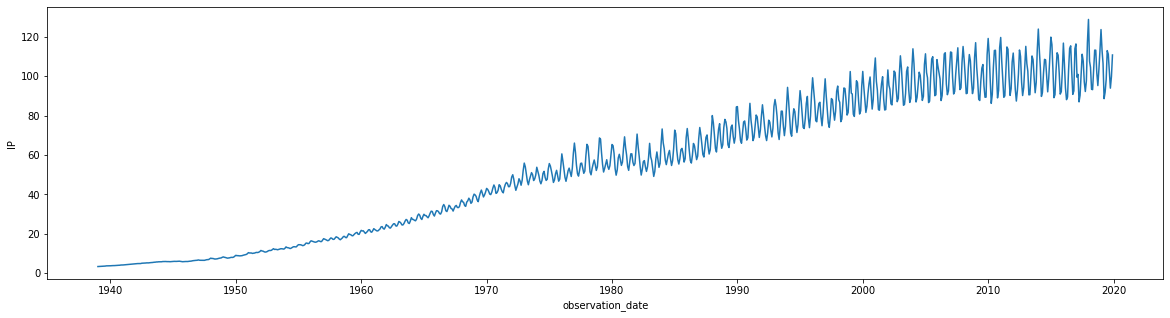

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(data.index, data['IPG2211A2N'])
plt.xlabel('observation_date')
plt.ylabel('IP')

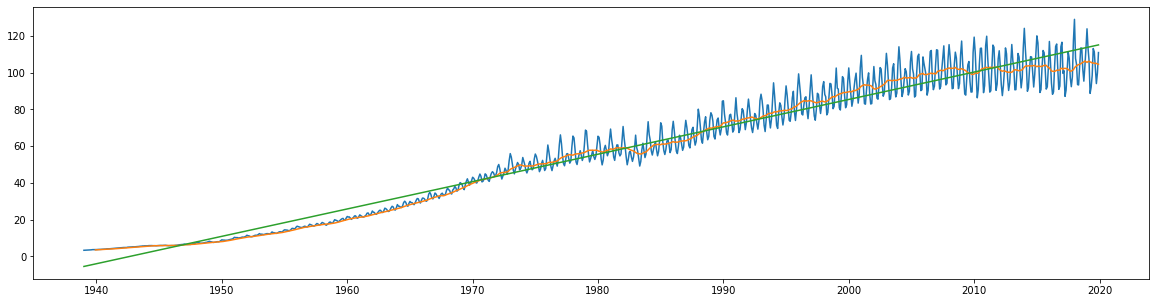

In [ ]:
from sklearn.linear_model import LinearRegression

N = len(data)  # Длина таблицы = количество строк
x_range = list(range(N))  # создать список, который пересчитывает натуральные числа от 0 до N
X = pd.DataFrame(x_range) # создать табличку из одной колонки

regressor = LinearRegression()
regressor.fit(X, data['IPG2211A2N'])

result = regressor.predict(X)

plt.figure(figsize=(20, 5))
plt.plot(data.index, data['IPG2211A2N'])
plt.plot(data.index, data['IPG2211A2N'].rolling(12).mean())
plt.plot(data.index, result)

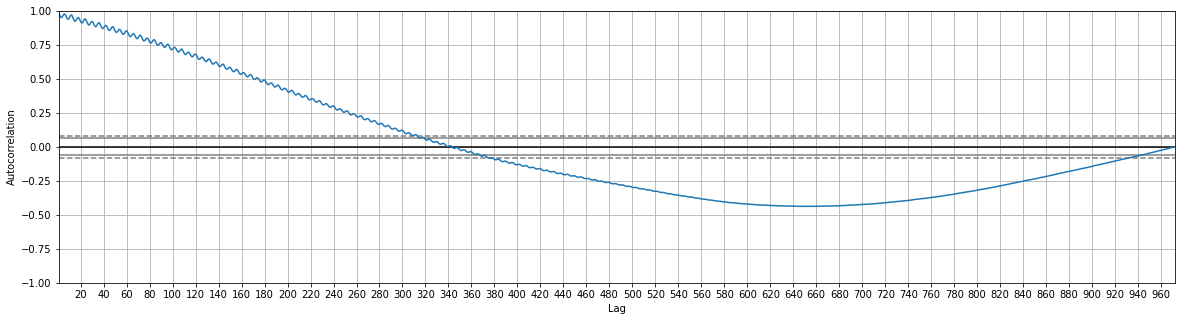

In [ ]:
# График, который показывает автокорреляцию в зависимости от сдвига (Lag)
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data['IPG2211A2N'])
plt.locator_params('x', nbins=50)


In [ ]:
data_crop = data[data.index > pd.Timestamp(year=2010, month=1, day=1)]
data_crop

,IPG2211A2N
observation_date,
2010-02-01,110.7525
2010-03-01,98.3430
2010-04-01,86.2612
2010-05-01,90.8459
2010-06-01,104.4774
...,...
2019-08-01,111.2697
2019-09-01,102.0033
2019-10-01,93.9993


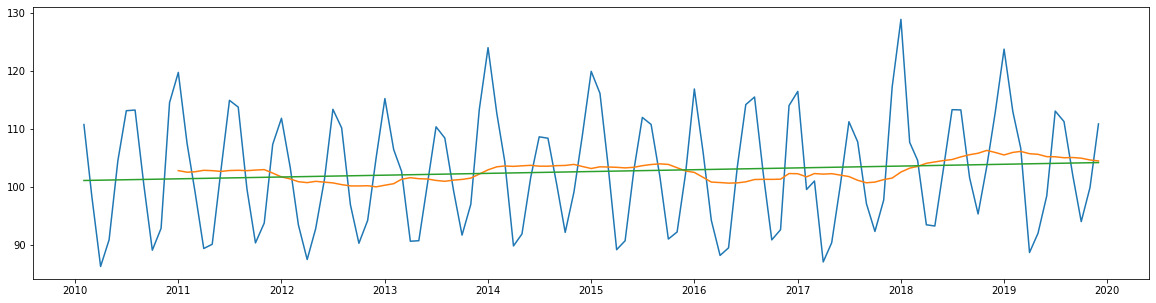

In [ ]:
N = len(data_crop)  # Длина таблицы = количество строк
x_range = list(range(N))  # создать список, который пересчитывает натуральные числа от 0 до N
X = pd.DataFrame(x_range) # создать табличку из одной колонки

regressor = LinearRegression()
regressor.fit(X, data_crop['IPG2211A2N'])

result = regressor.predict(X)

plt.figure(figsize=(20, 5))
plt.plot(data_crop.index, data_crop['IPG2211A2N'])
plt.plot(data_crop.index, data_crop['IPG2211A2N'].rolling(12).mean())
plt.plot(data_crop.index, result)

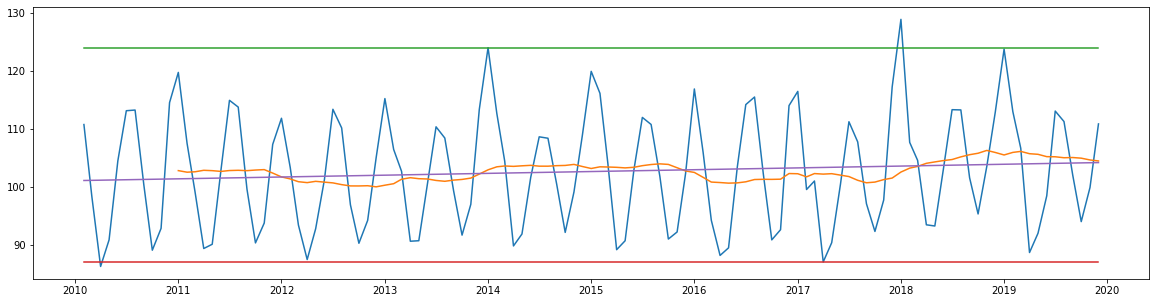

In [ ]:
quntile_99 = data_crop['IPG2211A2N'].quantile(0.99)
quntile_01 = data_crop['IPG2211A2N'].quantile(0.01)
data_crop = data_crop.copy()
data_crop['quantile_99'] = quntile_99
data_crop['quantile_01'] = quntile_01

plt.figure(figsize=(20, 5))
plt.plot(data_crop.index, data_crop['IPG2211A2N'])
plt.plot(data_crop.index, data_crop['IPG2211A2N'].rolling(12).mean())
plt.plot(data_crop.index, data_crop['quantile_99'])
plt.plot(data_crop.index, data_crop['quantile_01'])
plt.plot(data_crop.index, result)

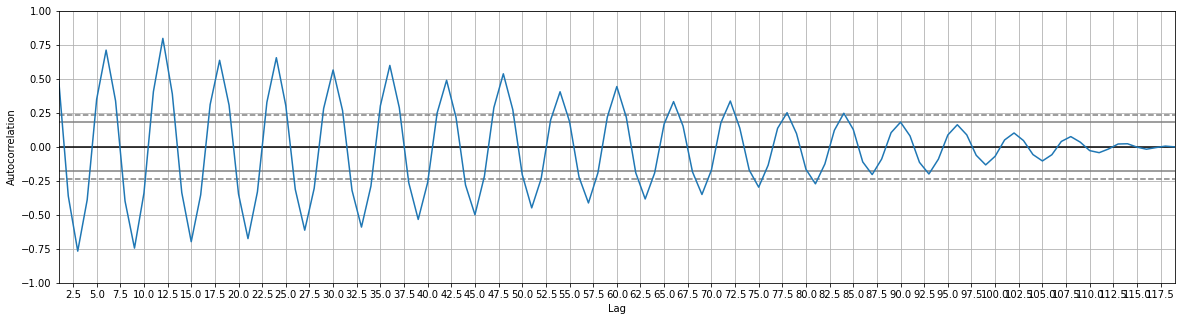

In [ ]:
plt.figure(figsize=(20, 5))
pd.plotting.autocorrelation_plot(data_crop['IPG2211A2N'])
plt.locator_params('x', nbins=50)

In [ ]:
# Полезно поискать причины полугодового цикла